# Problem Statement - Perform Sentiment analysis of IMDB reviews using NLP library Spacy 

## What is NLP

Natural language processing, or NLP, is a branch of linguistics that seeks to parse human language in a computer system.

## What is Spacy

Spacy is an advanced open-source industrial grade modern library for Natural Language Processing. spaCy comes with pretrained NLP models that can perform most common NLP tasks, such as tokenization, parts of speech (POS) tagging, named entity recognition (NER), lemmatization, transforming to word vectors etc.

## Important components of Spacy

- Doc object:It is a sequence of tokens that contains not just the original text but all the results produced by the spaCy model after processing the text. Useful information such as the lemma of the text, whether it is a stop word or not, named entities, the word vector of the text and so on are pre-computed and readily stored in the Doc object. An input string text is converted into doc object by calling the loaded nlp object on text.

- Token:Tokens are individual text entities that make up the text. Typically a token can be the words, punctuation, spaces, etc.

- Tokenization:This is the process of converting a text into smaller sub-texts, based on certain predefined rules. token.text gives the tokens. 

- Stopwords and Punctuation:These dont add any value to the meaning of the text and can impact the machine learning algorithm performance. These should be removed to reduce the size of the corpus and increase the computational efficiency. token.is_stop, token.is_punct, token.is_space etc can be used to remove these stopwords and punctuations.

- Lemmatization:This is the method of converting a token to it’s root/base form. token.lemma_ gives the root form of every token. 

- StringStore:paCy hashes or converts each string to a unique ID that is stored in the StringStore.It’s a dictionary mapping of hash values to strings. We can print the hash value if you know the string and vice-versa. This is contained in nlp.vocab.strings.

- Lexical attributes:These are the attributes of Token object, that give you information on the type of token. is_stop or is_punct are examples.

- Part of Speech tagging:Each word of a text is either a noun, pronoun, verb, conjection, etc. These tags are called as Part of Speech tags (POS).It is present in the pos_ attribute. Using spacy.explain() function , you can know the explanation or full-form in this case.Using spacy’s pos_ attribute, you can check if a particular token is junk through token.pos_ == 'X' and remove them.

- Rule-based matching:Rule-based matching in spacy allows you write your own rules to find or extract words and phrases in a text.
Spacy supports three kinds of matching methods :
    - Token Matcher:lets us match sequences based on lists of token descriptions
    - Phrase Matcher:accepts match patterns in the form of Doc objects
    - Entity Ruler:lets us add spans to the Doc using token-based rules or exact phrase matches. 
    
- Word Vectors:Word Vectors are numerical vector representations of words and documents. The numeric form helps understand the semantics about the word and can be used for NLP tasks such as classification.

- Named Entity Recognition: These are words that are referred as named-entities. They are real-world objects like name of a company , place,etc. Using spaCy’s ents attribute on a document, you can access all the named-entities present in the text.     Each named entity belongs to a category, like name of a person, or an organization, or a city, etc. We can access the same through .label_ attribute of spacy.
The common Named Entity categories supported by spacy are :
    - PERSON : Denotes names of people
    - GPE : Denotes places like counties, cities, states.
    - ORG : Denotes organizations or companies
    - WORK_OF_ART : Denotes titles of books, fimls,songs and other arts 
    - PRODUCT : Denotes products such as vehicles, food items ,furniture and so on.
    - EVENT : Denotes historical events like wars, disasters ,etc…
    - LANGUAGE : All the recognized languages across the globe.



## What are pipeline components ?

The spacy processing pipeline consists of components, where each component performs it’s task and passes the Processed Doc to the next component. These are called as pipeline components. spaCy provides certain in-built pipeline components. We can use sklearn.Pipeline library to manage spacy pipeline components.

The built-in pipeline components of spacy are :
- Tokenizer : It is responsible for segmenting the text into tokens are turning a Doc object. This the first and compulsory step in a pipeline.
- Tagger : It is responsible for assigning Part-of-speech tags. It takes a Doc as input and createsDoc[i].tag
- DependencyParser : It is known as parser. It is responsible for assigning the dependency tags to each token. It takes a Doc as input and returns the processed Doc
- EntityRecognizer : This component is referred as ner. It is responsible for identifying named entities and assigning labels to them.
- TextCategorizer : This component is called textcat. It will assign categories to Docs.
- EntityRuler : This component is called * entity_ruler*.It is responsible for assigning named entitile based on pattern rules. Revisit Rule Based Matching to know more.
- Sentencizer : This component is called **sentencizer** and can perform rule based sentence segmentation.
- merge_noun_chunks : It is called mergenounchunks. This component is responsible for merging all noun chunks into a single token. It has to be add in the pipeline after tagger and parser.
- merge_entities : It is called merge_entities .This component can merge all entities into a single token. It has to added after the ner.
- merge_subtokens : It is called merge_subtokens. This component can merge the subtokens into a single token.


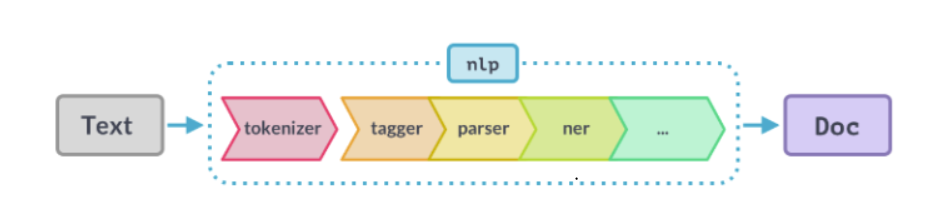

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

## Load the data

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df['sentiment_new']=np.where(df['sentiment']=='positive',1,0)
df.head(5)

,review,sentiment,sentiment_new
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


## Exploratory data analysis

We perform initial exploratory analysis to get an understanding of the data.

In [4]:
df.describe(include='all')

,review,sentiment,sentiment_new
count,50000,50000,50000.000000
unique,49582,2,NaN
top,Loved today's show!!! It was a variety and not...,negative,NaN
freq,5,25000,NaN
mean,NaN,NaN,0.500000
std,NaN,NaN,0.500005
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,0.500000
75%,NaN,NaN,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         50000 non-null  object
 1   sentiment      50000 non-null  object
 2   sentiment_new  50000 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 976.7+ KB


There are 50k reviews, each having review amd sentiment.

In [6]:
#sentiment distribution
df['sentiment_new'].value_counts()

0    25000
1    25000
Name: sentiment_new, dtype: int64

It is a balanced dataset.

In [7]:
#add column Length for extra information
df['length of review']=df['review'].apply(len)
df.head()

,review,sentiment,sentiment_new,length of review
0,One of the other reviewers has mentioned that ...,positive,1,1761
1,A wonderful little production. <br /><br />The...,positive,1,998
2,I thought this was a wonderful way to spend ti...,positive,1,926
3,Basically there's a family where a little boy ...,negative,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,1317


## Visualization

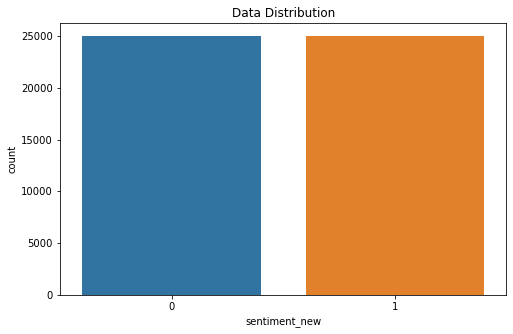

In [8]:
#target variable distribution
plt.figure(figsize = (8,5))
plt.title("Data Distribution")
sns.countplot(x = "sentiment_new", data = df)
plt.show()

The reviews data is well-balanced.

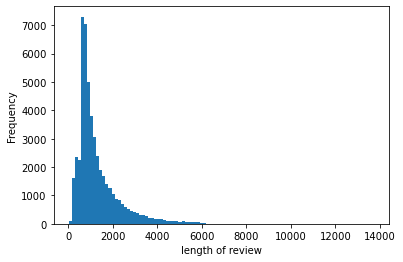

In [9]:
#histogram for length of review 
df['length of review'].plot(kind='hist',bins=100)
plt.xlabel('length of review')
plt.show()

Majoity of the reviews are upto 2000 characters long. 

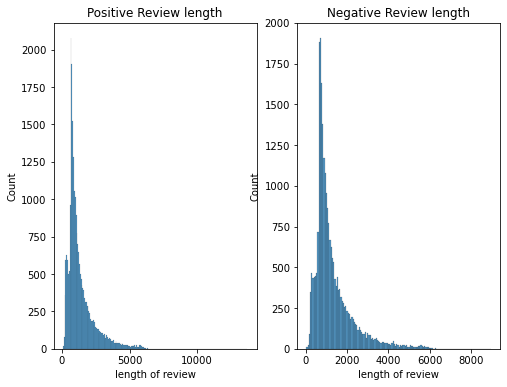

In [10]:
#which reviews are longer - Positive or Negative
fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(121)
sns.histplot(x='length of review', data = df[df['sentiment'] == 'positive'], ax=ax1)
plt.title("Positive Review length")
ax2 = fig.add_subplot(122)
sns.histplot(x='length of review', data = df[df['sentiment'] == 'negative'], ax=ax2)
plt.title("Negative Review length")
plt.show()

The negative reviews are longer in length.

## Data Pre-processing

We will perform these steps to pre-process the data, using spacy library

In [11]:
import spacy
#spacy for english language
nlp=spacy.load("en_core_web_sm")

In [12]:
#for punctuations
import string 
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [104]:
#for removing stopwords
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [14]:
from bs4 import BeautifulSoup

#removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [15]:
#removing the square brackets
def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [16]:
#removing special characters
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [17]:
def preprocess_text(text):
    
    #remove the html strips
    text = strip_html(text)
    
    #remove square brackets
    text = remove_square_brackets(text)
    
    #remove special characters
    text  = remove_special_characters(text)

    #remove the digits
    no_number = "".join([t for t in text if not t.isdigit()])
    
    #create the token object, that will be used to create documents with linguistic annotations
    tokenized_list = nlp(no_number)
    
    #lemmatize each token and convert each token into lower case
    tokenized_list = [word.lemma_.lower().strip() if word.lemma_ != '-PRON-' else words.lower_ for word in tokenized_list] 
    
    #remove punctuation 
    tokenized_list = [word  for word in tokenized_list if word not in punctuations] 
    
    #remove stop words 
    tokenized_list = [word  for word in tokenized_list if word not in stop_words] 
    
    
    return tokenized_list

The preprocess_text function performs the following steps:
- remove the html strips
- remove square brackets
- remove special characters
- remove the digits
- tokenize into words
- reduce each word to its lemma(lower case)
- remove punctuation
- drop the stop words

In [18]:
preprocess_text("Hello1 ! I am a Vegetarian by choice.") 

['hello', 'vegetarian', 'choice']

In [19]:
df['review_new']=df['review'].apply(preprocess_text)
df.head

<bound method NDFrame.head of                                                   review sentiment  \
0      One of the other reviewers has mentioned that ...  positive   
1      A wonderful little production. <br /><br />The...  positive   
2      I thought this was a wonderful way to spend ti...  positive   
3      Basically there's a family where a little boy ...  negative   
4      Petter Mattei's "Love in the Time of Money" is...  positive   
...                                                  ...       ...   
49995  I thought this movie did a down right good job...  positive   
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative   
49997  I am a Catholic taught in parochial elementary...  negative   
49998  I'm going to have to disagree with the previou...  negative   
49999  No one expects the Star Trek movies to be high...  negative   

       sentiment_new  length of review  \
0                  1              1761   
1                  1               998   
2  

In [45]:
df_positive = df[ df['sentiment_new'] == 1]
df_positive

,review,sentiment,sentiment_new,length of review,review_new
0,One of the other reviewers has mentioned that ...,positive,1,1761,"[reviewer, mention, watch, oz, episode, ll, ho..."
1,A wonderful little production. <br /><br />The...,positive,1,998,"[wonderful, little, production, film, techniqu..."
2,I thought this was a wonderful way to spend ti...,positive,1,926,"[think, wonderful, way, spend, time, hot, summ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,1317,"[petter, matteis, love, time, money, visually,..."
5,"Probably my all-time favorite movie, a story o...",positive,1,656,"[probably, alltime, favorite, movie, story, se..."
...,...,...,...,...,...
49983,"I loved it, having been a fan of the original ...",positive,1,695,"[love, having, fan, original, series, wonder, ..."
49985,Imaginary Heroes is clearly the best film of t...,positive,1,1168,"[imaginary, heroes, clearly, good, film, year,..."
49989,I got this one a few weeks ago and love it! It...,positive,1,967,"[week, ago, love, modern, light, fill, true, c..."
49992,John Garfield plays a Marine who is blinded by...,positive,1,968,"[john, garfield, play, marine, blind, grenade,..."


In [95]:
#combine all words in first 10 positive reviews, to generate the wordcloud
positive = [word for item in df_positive['review_new'][0:10] for word in item]
positive[0:10]

['reviewer',
 'mention',
 'watch',
 'oz',
 'episode',
 'll',
 'hook',
 'right',
 'exactly',
 'happen']

In [96]:
df_negative = df[ df['sentiment_new'] == 0]
df_negative

,review,sentiment,sentiment_new,length of review,review_new
3,Basically there's a family where a little boy ...,negative,0,748,"[basically, s, family, little, boy, jake, thin..."
7,"This show was an amazing, fresh & innovative i...",negative,0,934,"[amazing, fresh, innovative, idea, s, air, yea..."
8,Encouraged by the positive comments about this...,negative,0,681,"[encourage, positive, comment, film, look, for..."
10,Phil the Alien is one of those quirky films wh...,negative,0,578,"[phil, alien, quirky, film, humour, base, oddn..."
11,I saw this movie when I was about 12 when it c...,negative,0,937,"[movie, come, recall, scary, scene, big, bird,..."
...,...,...,...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative,0,759,"[typical, junk, comedythere, laugh, genuine, m..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0,642,"[bad, plot, bad, dialogue, bad, act, idiotic, ..."
49997,I am a Catholic taught in parochial elementary...,negative,0,1280,"[catholic, teach, parochial, elementary, schoo..."
49998,I'm going to have to disagree with the previou...,negative,0,1234,"[m, disagree, previous, comment, maltin, secon..."


In [97]:
#combine all words in first 10 negative reviews, to generate the wordcloud
negative = [word for item in df_negative['review_new'][0:10] for word in item]
negative[0:10]

['basically',
 's',
 'family',
 'little',
 'boy',
 'jake',
 'think',
 's',
 'zombie',
 'closet']

In [98]:
from wordcloud import WordCloud

def create_wordcloud(data):
    all_words = ' '.join(data)
    all_cleaned_words = " ".join([w for w in all_words.split() if(w!='movie' and w!='film')])
    wc = WordCloud(stopwords=stop_words, width=3000,height=2000).generate(all_cleaned_words)
    plt.figure(1,figsize=(10, 8))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

Positive words in the cleaned reviews


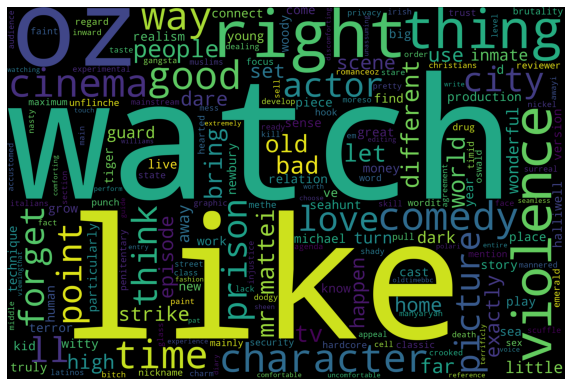

In [99]:
print("Positive words in the cleaned reviews")
create_wordcloud(positive)

Positive words that are highlighted are:like,good,love,good,right,wonderful.

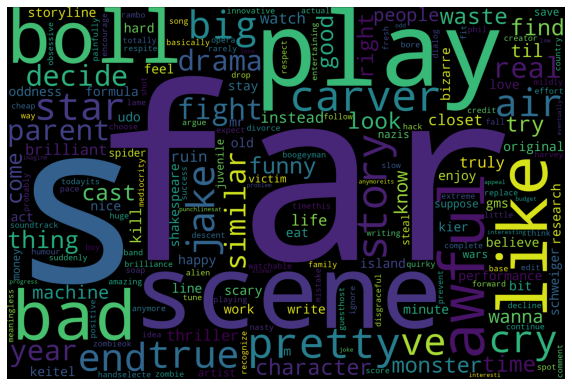

In [100]:
#print("Negative words in the cleaned reviews")
create_wordcloud(negative)

Negative words that are highlighted are:far,cry,end,scene,monster,fight.

## Split data into Train and Test

We will split train and test data in the ratio of 70:30.

In [20]:
#separate independent and dependent variables
X=df['review']
y=df['sentiment_new']

In [21]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [22]:
#check the shape of X_train and y_train
X_train.shape, y_train.shape

((35000,), (35000,))

In [23]:
#check the shape of X_test and y_test
X_test.shape, y_test.shape

((15000,), (15000,))

## Transformation of data

Word Vectorization is an NLP technique for mapping words or phrases from a lexicon to a corresponding vector of real numbers,
which can then be used to derive word predictions and semantics. It is the process of translating words into numbers. 

After data preprocessing, the next step is going to be generating a sparse matrix using CountVectorizer and then TF-IDF using sklearn. 

We are going to use sklearn.feature_extraction.text.TfidfVectorizer which has CountVectorizer included in it so we do not have to use it as a separate step.

In [43]:
tfdif_vector = TfidfVectorizer(tokenizer=preprocess_text)
tfdif_vector

TfidfVectorizer(tokenizer=<function preprocess_text at 0x0000020260568550>)

## Create the pipeline using separate Models

We will instantiate the models and set up the pipelines.

In [25]:
#instantiate the models
nb = MultinomialNB()
lr = LogisticRegression()
rf = RandomForestClassifier()

In [26]:
#setup naive bayes pipeline
pipeline_nb =Pipeline([
    ('tfidf',tfdif_vector),
    ('classifier',nb)
])


pipeline_nb

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function preprocess_text at 0x0000020260568550>)),
                ('classifier', MultinomialNB())])

In [27]:
#setup logistic regression pipeline
pipeline_lr =Pipeline([
    ('tfidf',tfdif_vector),
    ('classifier',lr)
])

pipeline_lr

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function preprocess_text at 0x0000020260568550>)),
                ('classifier', LogisticRegression())])

In [28]:
#setup random forest pipeline
pipeline_rf =Pipeline([
    ('tfidf',tfdif_vector),
    ('classifier',rf)
])

pipeline_rf

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function preprocess_text at 0x0000020260568550>)),
                ('classifier', RandomForestClassifier())])

## Model training

We will train the various pipelines on the training data.

In [29]:
pipeline_nb.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function preprocess_text at 0x0000020260568550>)),
                ('classifier', MultinomialNB())])

In [36]:
pipeline_lr.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function preprocess_text at 0x0000020260568550>)),
                ('classifier', LogisticRegression())])

In [37]:
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function preprocess_text at 0x0000020260568550>)),
                ('classifier', RandomForestClassifier())])

## Generate model metrics

We will generate classification report, confusion matrix and accuracy score of all the models to compare and evaluate the best model for this used case.

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def generate_metrics(model_name,y_test,y_preds):
    #print classification report
    print('\nModel name:',model_name)
    print('\nClassification report')
    print('\n')
    print(classification_report(y_test,y_preds))
    #print confusion matrix
    print('\nConfusion Matrix')
    print(confusion_matrix(y_test,y_preds))
    print('\n')
    #print overall accuracy
    print('\nAccuracy')
    print(accuracy_score(y_test,y_preds))
    print('\n')
    
    pass

In [33]:
generate_metrics('Naive bayes', y_test,pipeline_nb.predict(X_test))


Model name: Naive bayes

Classification report


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7540
           1       0.86      0.86      0.86      7460

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000


Confusion Matrix
[[6483 1057]
 [1037 6423]]



Accuracy
0.8604




In [38]:
generate_metrics('Logistic Regression',y_test,pipeline_lr.predict(X_test))


Model name: Logistic Regression

Classification report


              precision    recall  f1-score   support

           0       0.90      0.87      0.88      7540
           1       0.87      0.90      0.88      7460

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000


Confusion Matrix
[[6536 1004]
 [ 742 6718]]



Accuracy
0.8836




In [39]:
generate_metrics('Random Forest',y_test,pipeline_rf.predict(X_test))


Model name: Random Forest

Classification report


              precision    recall  f1-score   support

           0       0.85      0.84      0.85      7540
           1       0.84      0.85      0.85      7460

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000


Confusion Matrix
[[6346 1194]
 [1113 6347]]



Accuracy
0.8462




## Model Evaluation

Looking at the accuracy levels, our logistic regression model has the best accuracy results of approx. 88%. 

We can now use our model to see if we can classify a review as either positive or negative.

In [41]:
#random review
sentiment = pipeline_lr.predict(["This was a boring movie"])
sentiment

array([0])

This is a negative review.

In [42]:
#2nd random review
sentiment2 = pipeline_lr.predict(["It was an awesome movie. I loved it."])
sentiment2

array([1])

This is a positive review.

## Conclusion

Our sentiment analyser has a good accuracy score of 88%. And it can make accurate predictions.